In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential # Sequential to add layers
from keras.layers import Conv2D,MaxPool2D,Flatten # convoultional and pooling layer

In [3]:
os.listdir('/content/drive/MyDrive/Brain_tumor/Brain_Tumor/Training')

['glioma', 'pituitary', 'notumor', 'meningioma']

In [4]:
train_path = '/content/drive/MyDrive/Brain_tumor/Brain_Tumor/Training'
x_train = []
y_train = []
categories = ['glioma', 'pituitary', 'notumor', 'meningioma']
for category in categories:
  sub_dir_path = os.path.join(train_path,category)
  # print(sub_dir_path)
  images = os.listdir(sub_dir_path)
  # print(images)
  for img in images:
    img_path = os.path.join(sub_dir_path,img)
    # print(img_path)
    img_array = imread(img_path)
    # print(img_array.shape) # some are 2D and some are 3D images
    # converting all images to same size and it will also get normalised along with that
    img_resized = resize(img_array,(150,150,1)) # b/w image, not color image
    x_train.append(img_resized)
    y_train.append(categories.index(category))
  print("Loaded successfully........",category)

Loaded successfully........ glioma
Loaded successfully........ pituitary
Loaded successfully........ notumor
Loaded successfully........ meningioma


In [5]:
os.listdir('/content/drive/MyDrive/Brain_tumor/Brain_Tumor/Testing')

['pituitary', 'notumor', 'meningioma', 'glioma']

training and testing order should be same

['glioma', 'pituitary', 'notumor', 'meningioma']

[0,1,2,3] => index

In [6]:
test_path = '/content/drive/MyDrive/Brain_tumor/Brain_Tumor/Testing'
x_test = []
y_test = []
categories = ['glioma', 'pituitary', 'notumor', 'meningioma']
for category in categories:
  sub_dir_path = os.path.join(test_path,category)
  images = os.listdir(sub_dir_path)
  for img in images:
    img_path = os.path.join(sub_dir_path,img)
    img_array = imread(img_path)
    img_resized = resize(img_array,(150,150,1))
    x_test.append(img_resized)
    y_test.append(categories.index(category))
  print("Loaded Successfuly........",category)

Loaded Successfuly........ glioma
Loaded Successfuly........ pituitary
Loaded Successfuly........ notumor
Loaded Successfuly........ meningioma


In [7]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)

In [8]:
x_train.shape,x_test.shape

((5529, 150, 150, 1), (1311, 150, 150, 1))

((5529, 150, 150, 1), (1311, 150, 150, 1))

it is 4 dimension

5529 -> images in x_train & 1311 images in x_test

(150,150,1) -> 150 rows, 150 columns, and 1 single value no clr image(3)

In [9]:
x_train.ndim  # dimension

4

In [10]:
x_test.ndim

4

In [11]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
y_train.shape

(5529,)

In [13]:
y_test.shape

(1311,)

In [14]:
y_train.ndim

1

In [15]:
y_test.ndim

1

In [16]:
from keras.layers import Dense

In [17]:
# To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu')) # adding the convolutional layer
model.add(MaxPool2D(2,2))
# model.add(Conv2D(32,(3,3),activation='relu')) can add as much as convolutional and pooling layer
# model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu')) # fully connected layer
model.add(Dense(4,activation='softmax')) # output layer

##model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))

here 32 is the no.of filters we are using

(3,3) is the dimension of filters

## model.add(MaxPool2D(2,2))

(2,2) is the pooling layer dimension, if we are not specifying the strid it will take the dimension of pooling layer as default.

## model.add(Dense(100,activation='relu'))

100 is the no.of neurons in the fully connected layer

## model.add(Dense(4,activation='softmax'))

4 is the no.of neurons in the output layer, bcz there are 4 classes ['glioma', 'pituitary', 'notumor', 'meningioma']

but in binary classification we give 1 instead of 4

it is based on the no.of classes present in the output

softmax is based on probability

these are all applicable to multi class classification of ANN

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,batch_size=12,epochs=10)

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6581 - loss: 1.0969
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9089 - loss: 0.2406
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9754 - loss: 0.0963
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9898 - loss: 0.0368
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9926 - loss: 0.0228
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9971 - loss: 0.0135
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9914 - loss: 0.0285
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9989 - loss: 0.0066
Epoch 9/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9998 - loss: 0.0035
Epoch 10/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 4.3851e-04


In [21]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Loss = ",loss)
print("Accuracy = ",accuracy)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9282 - loss: 0.2984
Loss =  0.2419293224811554
Accuracy =  0.9473684430122375


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
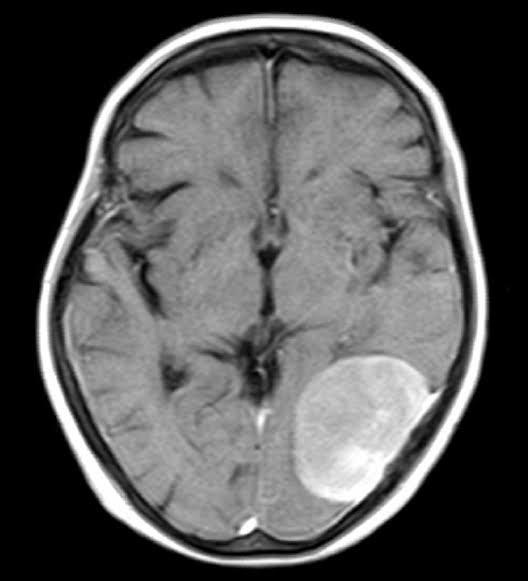

In [22]:
new_img = imread('/content/drive/MyDrive/Brain_tumor/Brain_Tumor/Testing/meningioma/Te-meTr_0004.jpg') # meningioma
new_img

The dimension of the image need to be predicted is (581, 528, 3) so we need to convert it into (150,150,1)

In [23]:
new_resized = resize(new_img,(150,150,1))
# new_resized
new_resized.shape

(150, 150, 1)

our training data x_train's dimension is 4D so we need to convert it into that form as (1,150,150,1)

In [24]:
new = new_resized.reshape(1,150,150,1)
new.shape

(1, 150, 150, 1)

In [25]:
pred = model.predict(new)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


array([[1.0222790e-21, 3.1975254e-21, 3.1814083e-11, 1.0000000e+00]],
      dtype=float32)

we cannot find which one is the largest value from these array.

we will choose the highest value as the predicted category

so inorder to find the highest value we have to find the index of that value usig argmax

In [26]:
ind = pred.argmax()
ind

3

In [27]:
categories[ind]

'meningioma'

In [30]:
# using function we can perform all these
def predict_new(img,model):
  img1=resize(img,(150,150,1))
  img1=img1.reshape(1,150,150,1)
  pred=model.predict(img1)
  ind=pred.argmax()
  print("Predicted class : ",categories[ind])

In [31]:
img=imread('/content/drive/MyDrive/Brain_tumor/Brain_Tumor/Testing/meningioma/Te-meTr_0004.jpg')
predict_new(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class :  meningioma
